# Experiments on the use of the different estimated distributions in the 2D case with toy data, for classification purposes

In [1]:
run init.ipynb

Done.


In [2]:
# Dataset default parameters
dataset_name = DATASET_NAME
num_samples = NUM_SAMPLES
imbalance_ratio = IMBALANCE_RATIO

# Missingness default parameters
missingness_pattern = MISSINGNESS_PATTERN
ratio_of_missing_values = RATIO_OF_MISSING_VALUES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

verbosity=0

df = create_df()

df_moons = df.query(" `dataset_name` == 'moons' ")
df_circles = df.query(" `dataset_name` == 'circles' ")
#df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio").drop_duplicates()

## Intro: Illustration of the 5 missingness Patterns exploited

These appear to be pretty fundamental, so they might be enough to cover any situations (or causal dependence on the three variables X, Y and Z), using combinations of them.


1) Pattern 1: There are no mutual information between Z and X, Y     

2) Pattern 2: There are mutual information between Z and X (if X_1=0 then Z_2=1 and vice-versa), but not between Z and Y

3) Pattern 3: There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), but not between Z and Y

4) Pattern 4: There are no mutual information between Z and X, but there are between Z and Y (one class has higher rate of missing value)

5) Pattern 5: There are mutual information between Z and X (Z_1 and Z_2 depend on X_1 and X_2), and between Z and Y (one class has higher rate of missing value)


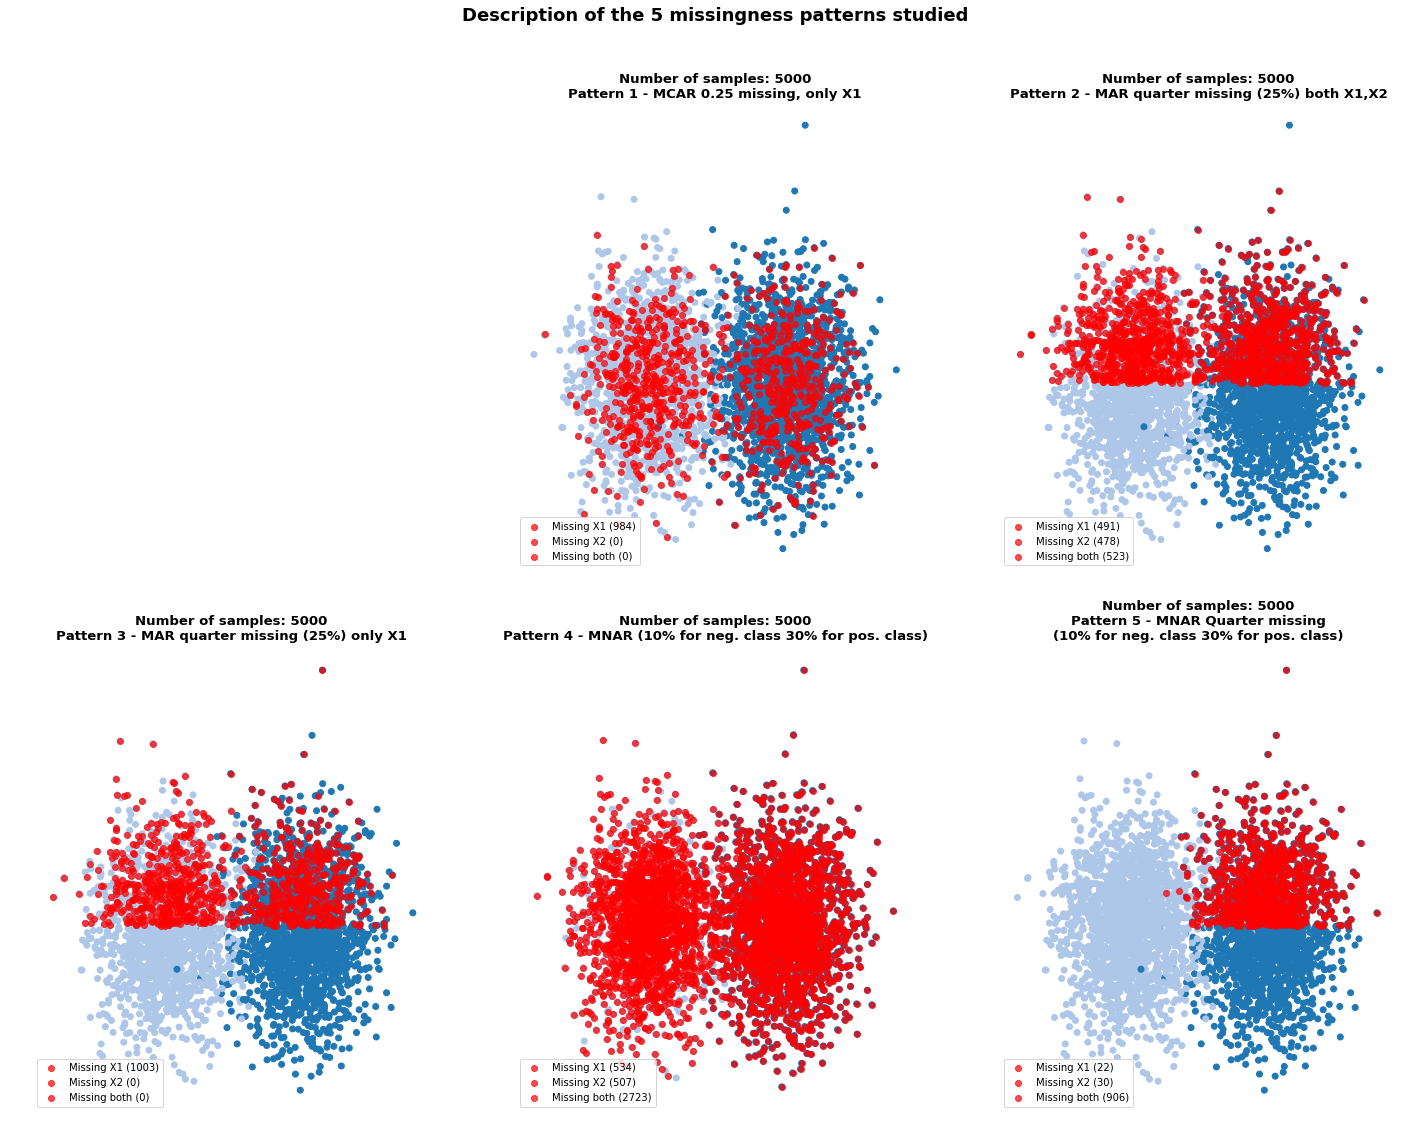

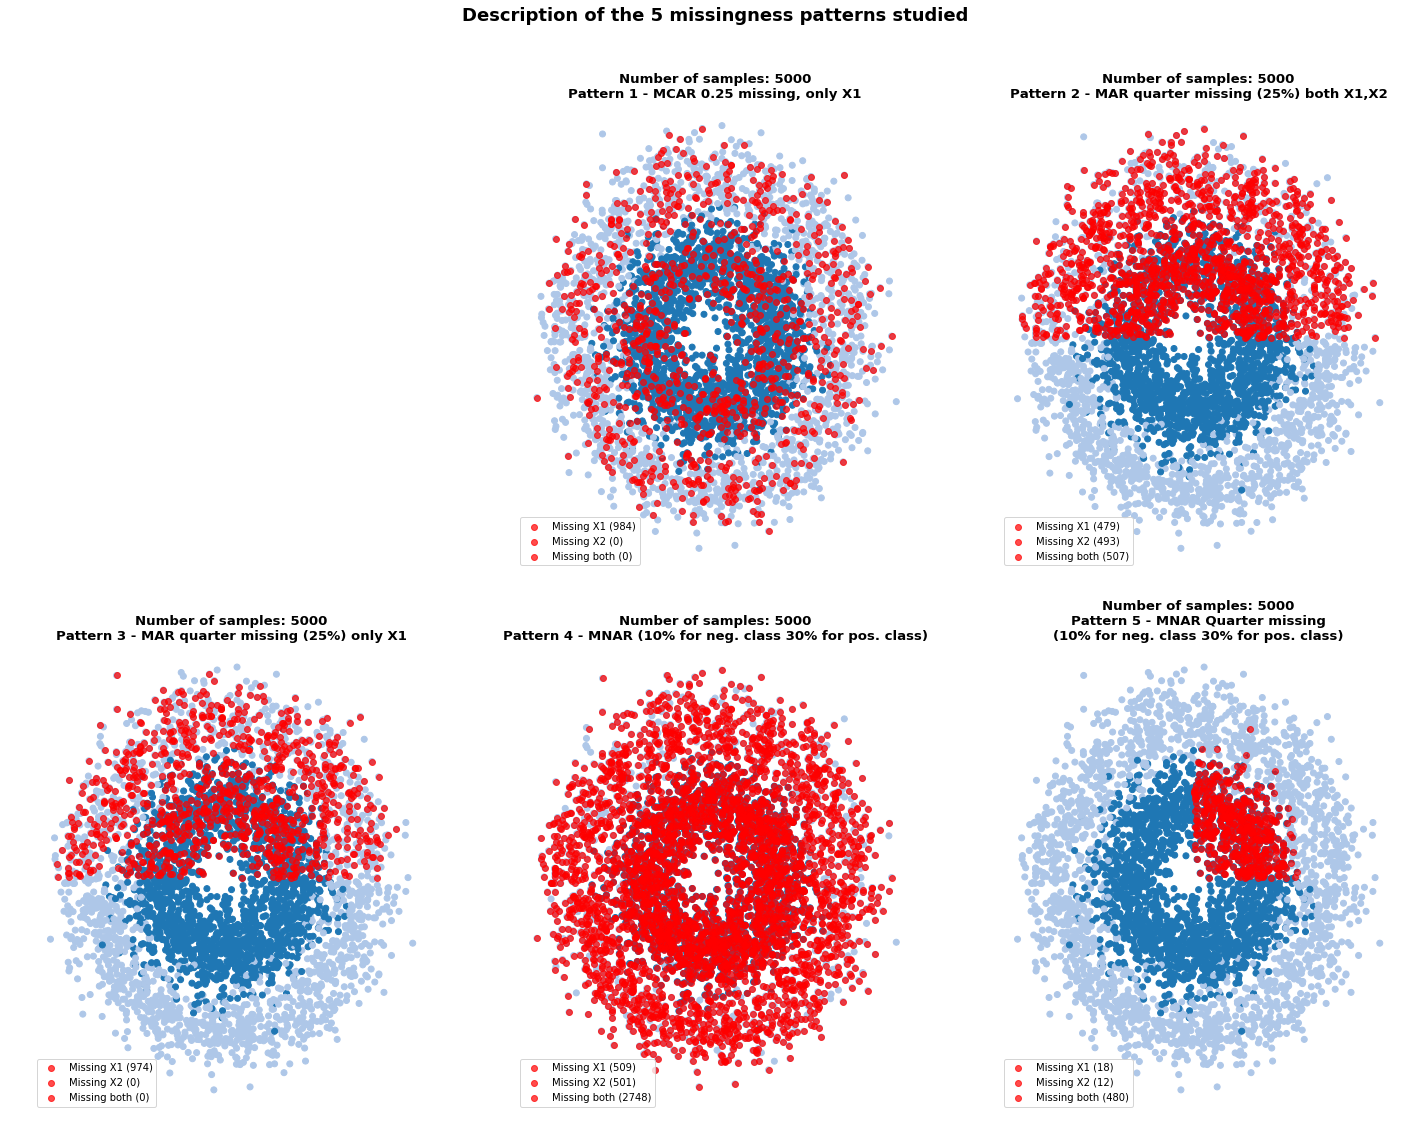

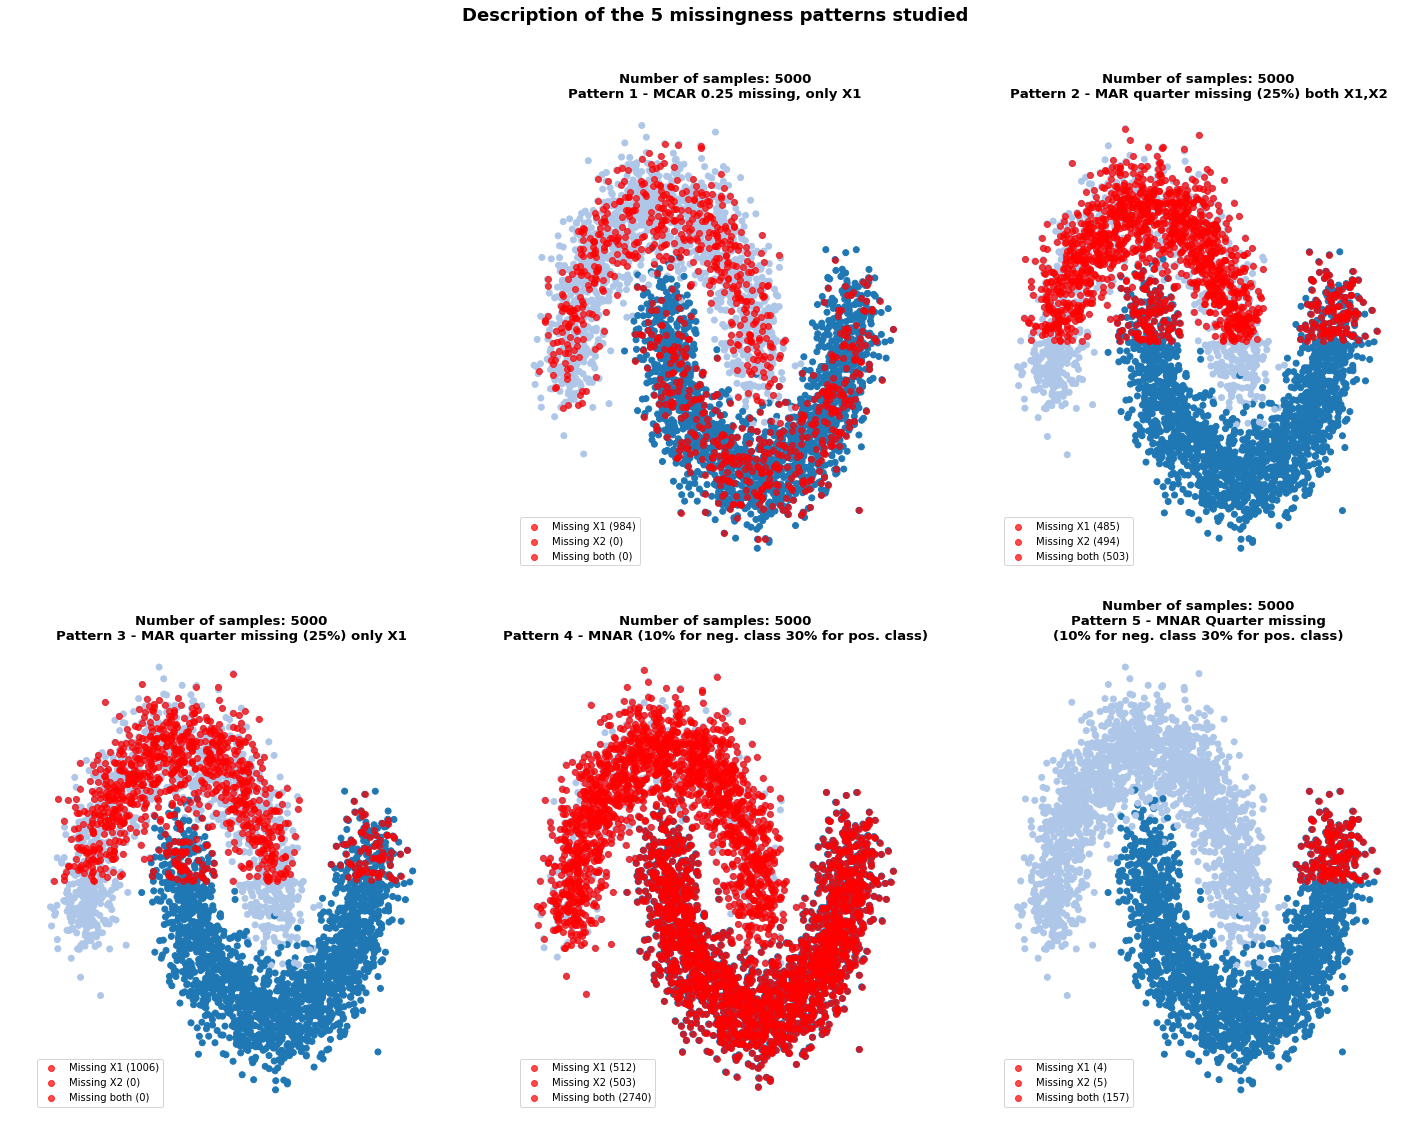

In [91]:
# Dataset default parameters
dataset_name = 'blobs'
num_samples = 5000
imbalance_ratio = .5
ratio_of_missing_values = .2
verbosity=0
missing_data_handling = MISSING_DATA_HANDLING
imputation_method = DEFAULT_IMPUTATION_METHOD

for dataset_name in ['blobs', 'circles', 'moons']:
    
    dataset = DatasetGenerator(dataset_name=dataset_name, 
                        num_samples=num_samples, 
                        imbalance_ratio=imbalance_ratio, 
                        missing_data_handling=missing_data_handling,
                        imputation_method=imputation_method,
                        verbosity=verbosity)
    dataset.split_test_train()

    fig, axes = plt.subplots(2, 3, figsize=(20, 15));axes = axes.flatten()
    fig.suptitle("Description of the 5 missingness patterns studied", y=1.05, fontsize=18, weight='bold')

    for i, missingness_pattern in enumerate([1, 2, 3, 4, 5]):

        # Creation of the missingness
        dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern)
        axes[i+1], _  = dataset.plot(ax1=axes[i+1],ax2=None, title=False)
        axes[i+1].set_title("{}\n{}".format(dataset.dataset_description, dataset.missingness_description), weight='bold')
    [axes[i].axis('off') for i in range(len(axes))]; plt.tight_layout()
    
    

# Intro: Qualitative exploration of the distributions

Experiment 2 loaded successfully! :-)


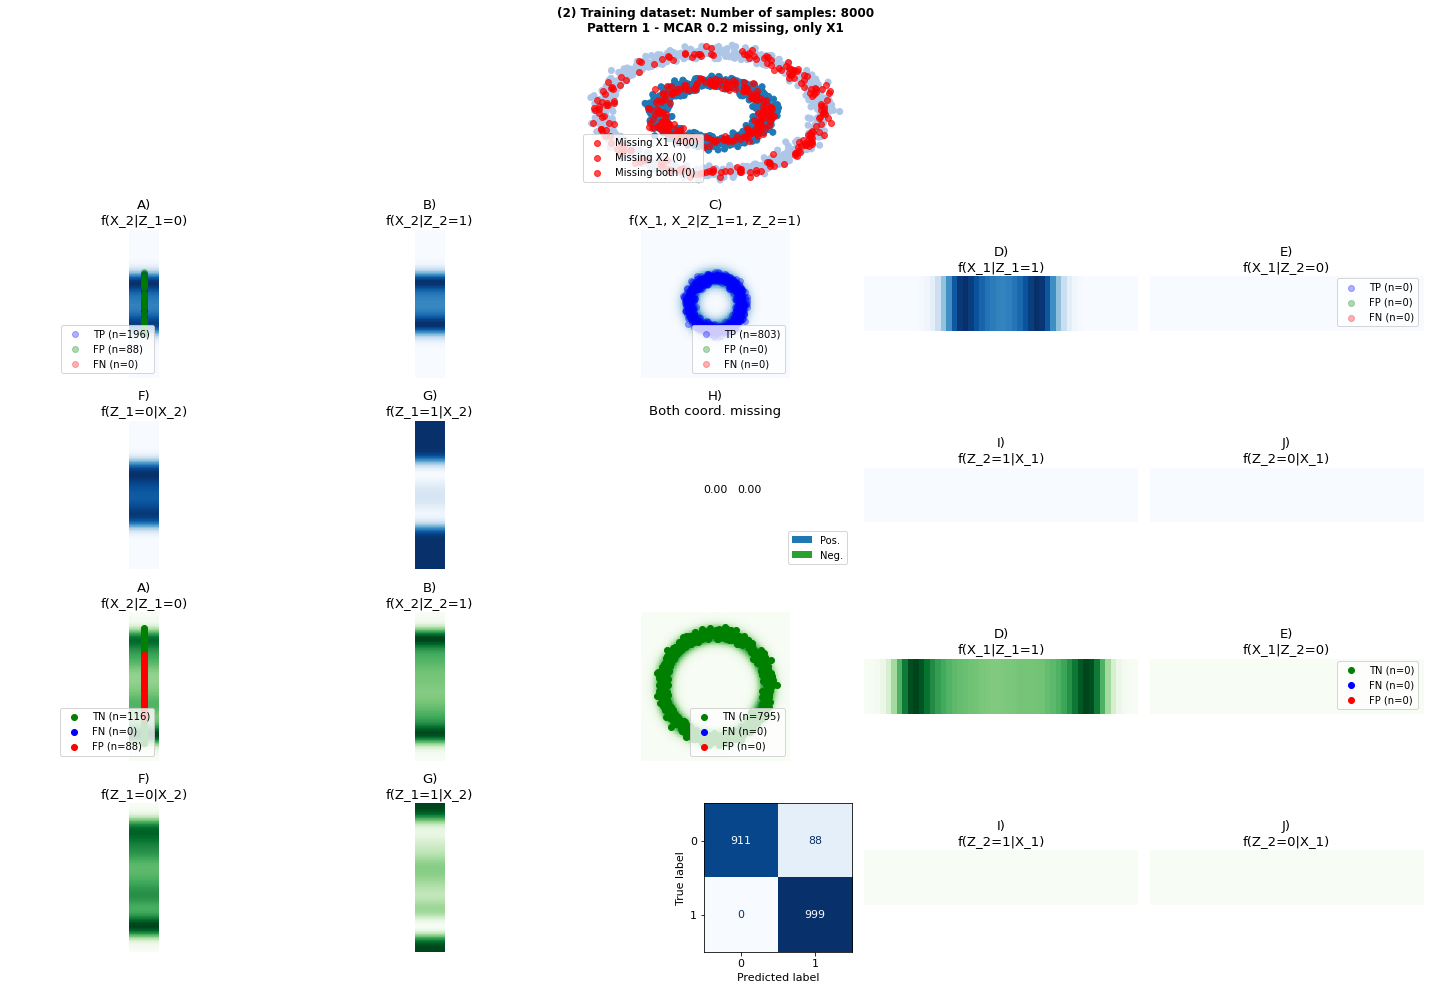

Sample: 999 positive and 999 negative samples (#p/#n=100%)



0
Accuracy                                            0.956
F1 score (2 PPVxTPR/(PPV+TPR))                      0.958
Matthews correlation coefficient (MCC)              0.915
Sensitivity, recall, hit rate, or true positive...  1.000
Specificity, selectivity or true negative rate ...  0.912
Precision or positive predictive value (PPV)        0.919
Negative predictive value (NPV)                     1.000
Miss rate or false negative rate (FNR)              0.000
False discovery rate (FDR=1-PPV)                    0.081
False omission rate (FOR=1-NPV)                     0.000

In [6]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 4
Experiment 34 loaded successfully! :-)


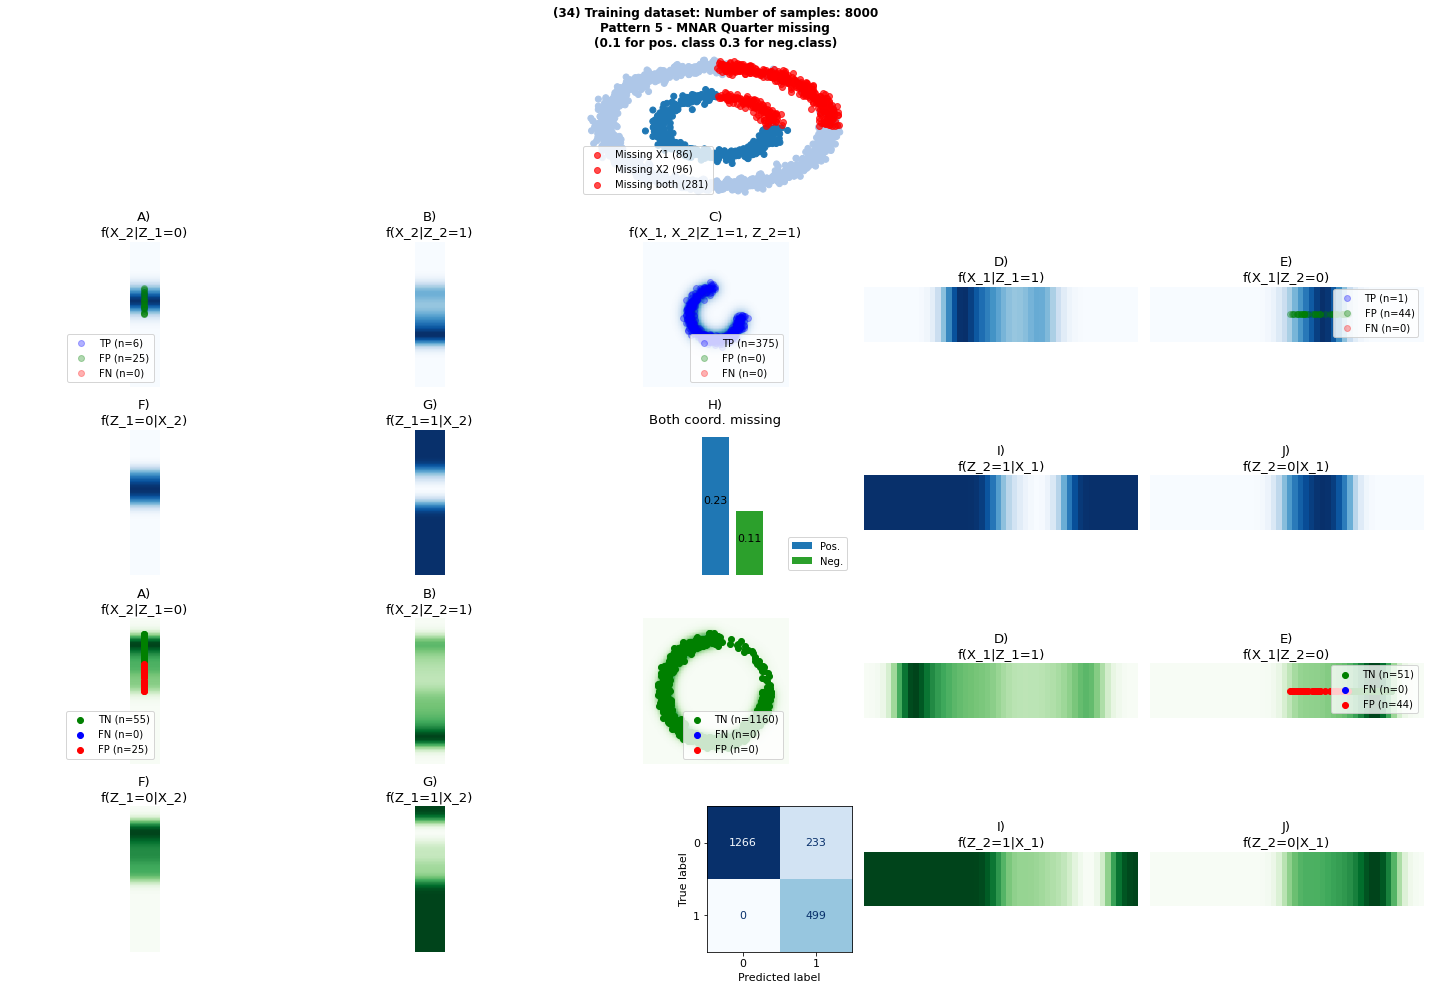

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



0
Accuracy                                            0.883
F1 score (2 PPVxTPR/(PPV+TPR))                      0.811
Matthews correlation coefficient (MCC)              0.759
Sensitivity, recall, hit rate, or true positive...  1.000
Specificity, selectivity or true negative rate ...  0.845
Precision or positive predictive value (PPV)        0.682
Negative predictive value (NPV)                     1.000
Miss rate or false negative rate (FNR)              0.000
False discovery rate (FDR=1-PPV)                    0.318
False omission rate (FOR=1-NPV)                     0.000

In [56]:
dataset_name = 'circles'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=34, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 39
Experiment 39 loaded successfully! :-)


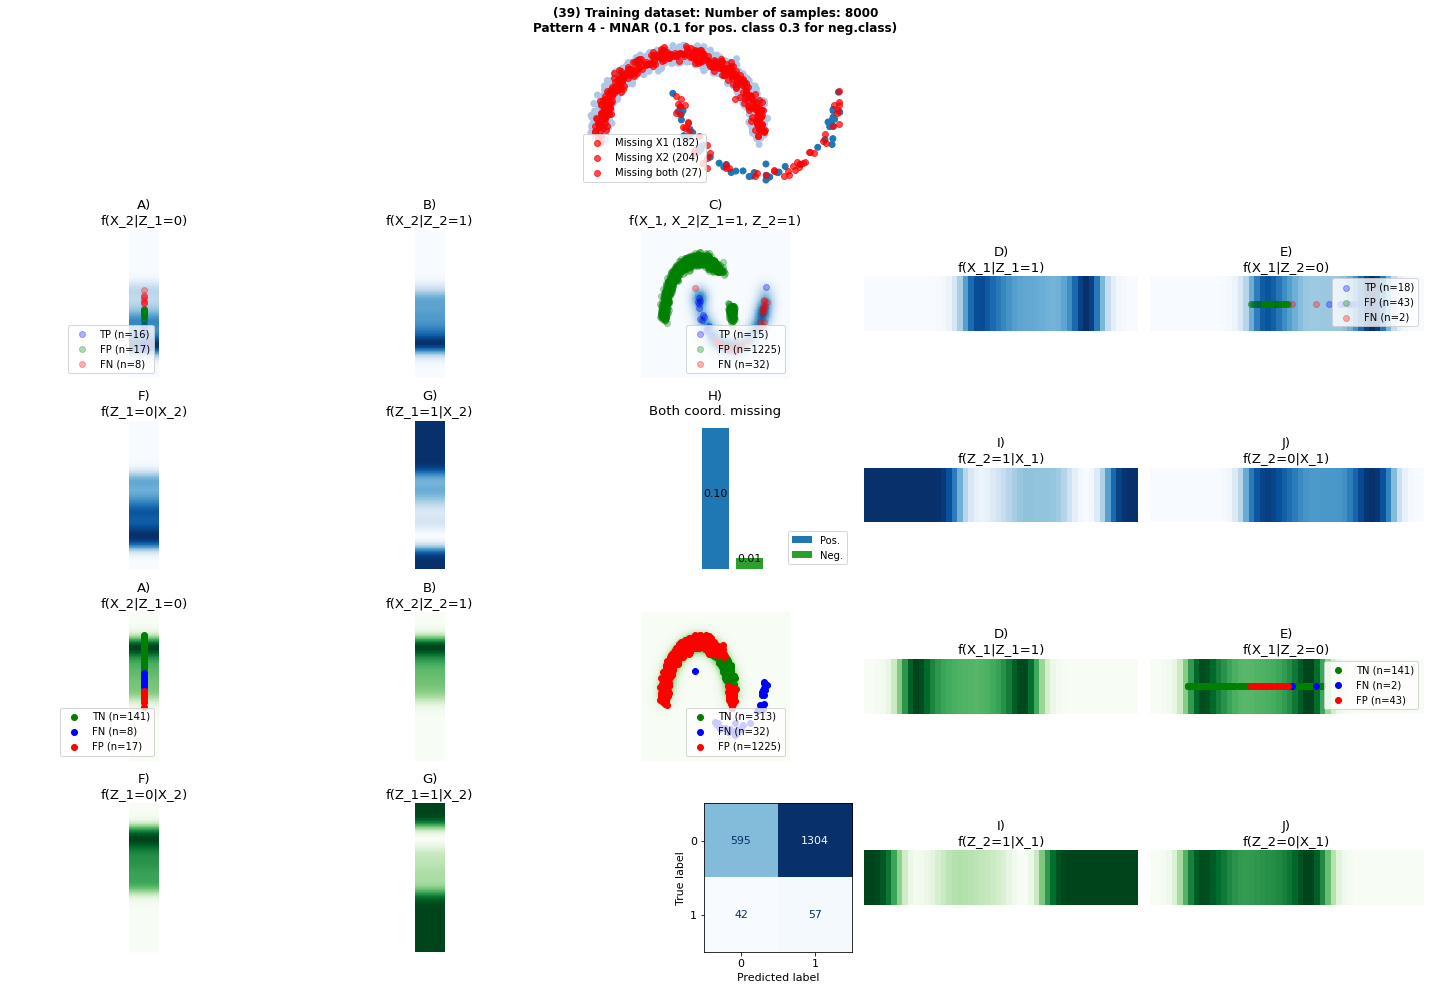

Sample: 99 positive and 1899 negative samples (#p/#n=  5%)



0
Accuracy                                            0.326
F1 score (2 PPVxTPR/(PPV+TPR))                      0.078
Matthews correlation coefficient (MCC)             -0.052
Sensitivity, recall, hit rate, or true positive...  0.576
Specificity, selectivity or true negative rate ...  0.313
Precision or positive predictive value (PPV)        0.042
Negative predictive value (NPV)                     0.934
Miss rate or false negative rate (FNR)              0.424
False discovery rate (FDR=1-PPV)                    0.958
False omission rate (FOR=1-NPV)                     0.066

In [28]:
dataset_name = 'moons'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

Loading experiment 75
Experiment 75 loaded successfully! :-)


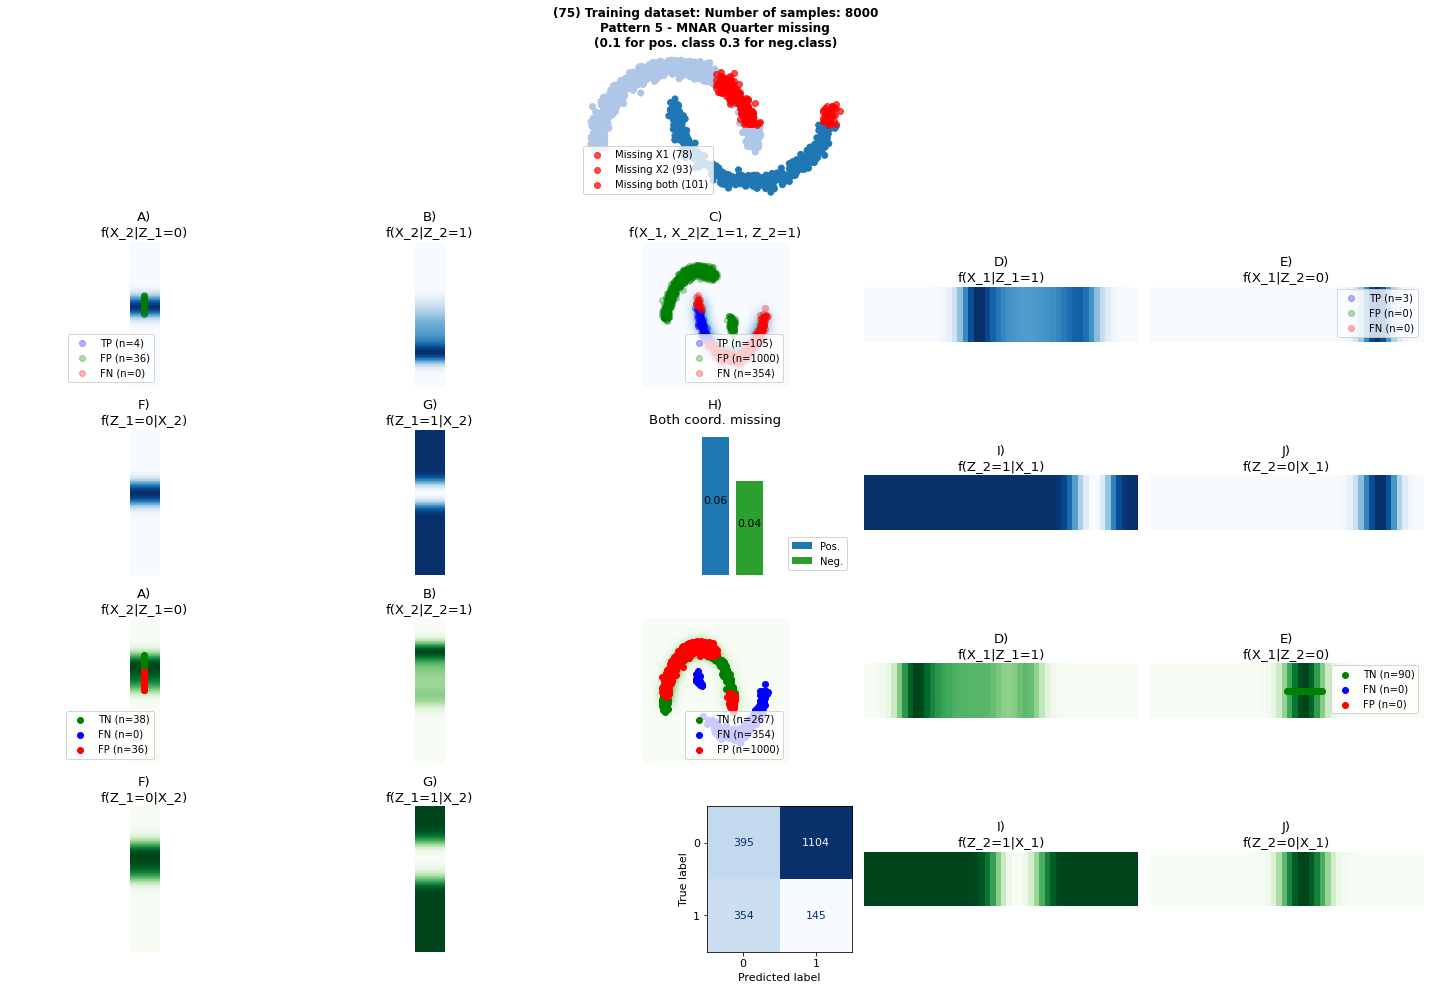

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



0
Accuracy                                            0.270
F1 score (2 PPVxTPR/(PPV+TPR))                      0.166
Matthews correlation coefficient (MCC)             -0.399
Sensitivity, recall, hit rate, or true positive...  0.291
Specificity, selectivity or true negative rate ...  0.264
Precision or positive predictive value (PPV)        0.116
Negative predictive value (NPV)                     0.527
Miss rate or false negative rate (FNR)              0.709
False discovery rate (FDR=1-PPV)                    0.884
False omission rate (FOR=1-NPV)                     0.473

In [40]:
dataset_name = 'moons'

random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=True, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

#  Experiment 1) Comparison between $f_{X_2|Z_1=0, Z_2=1}$ and $f_{X_2|Z_1=1, Z_2=1}$ in the case of different missingness patterns.

We expect there are the same in the case of MCAR (no mutual information between X and Z).
There might be additional situation when there are the same, this experiment aims at investigate it for two datasets. 
    

1) We want to investigate here if we can verify that those two distributions are the same in the case of MCAR (no mutual information between X and Z).
2) We want to investigate how the distance between both evolve depending on the level of missing data, and on the mechanism. 

**Note on the experiment setting**
* We assume we have sufficient data to estimate accurately both distributions, so setting the number of sample N is high so that there are enough missing data, and the resolution of the grid h is high, to compute meaningful distance.
* We use both the Jensen-Shannon divergence and the Earth Movers' distance to compare distributions.


*The goal is to reach better intuitions on how Z affect X, to infer how we can use it. 
Nothe that here we set ourselves the missingness mechanism. In real settings, we might not have this information and so run hypothesis testing, or we may have prior knowdledge.*



Experiment 45 loaded successfully! :-)


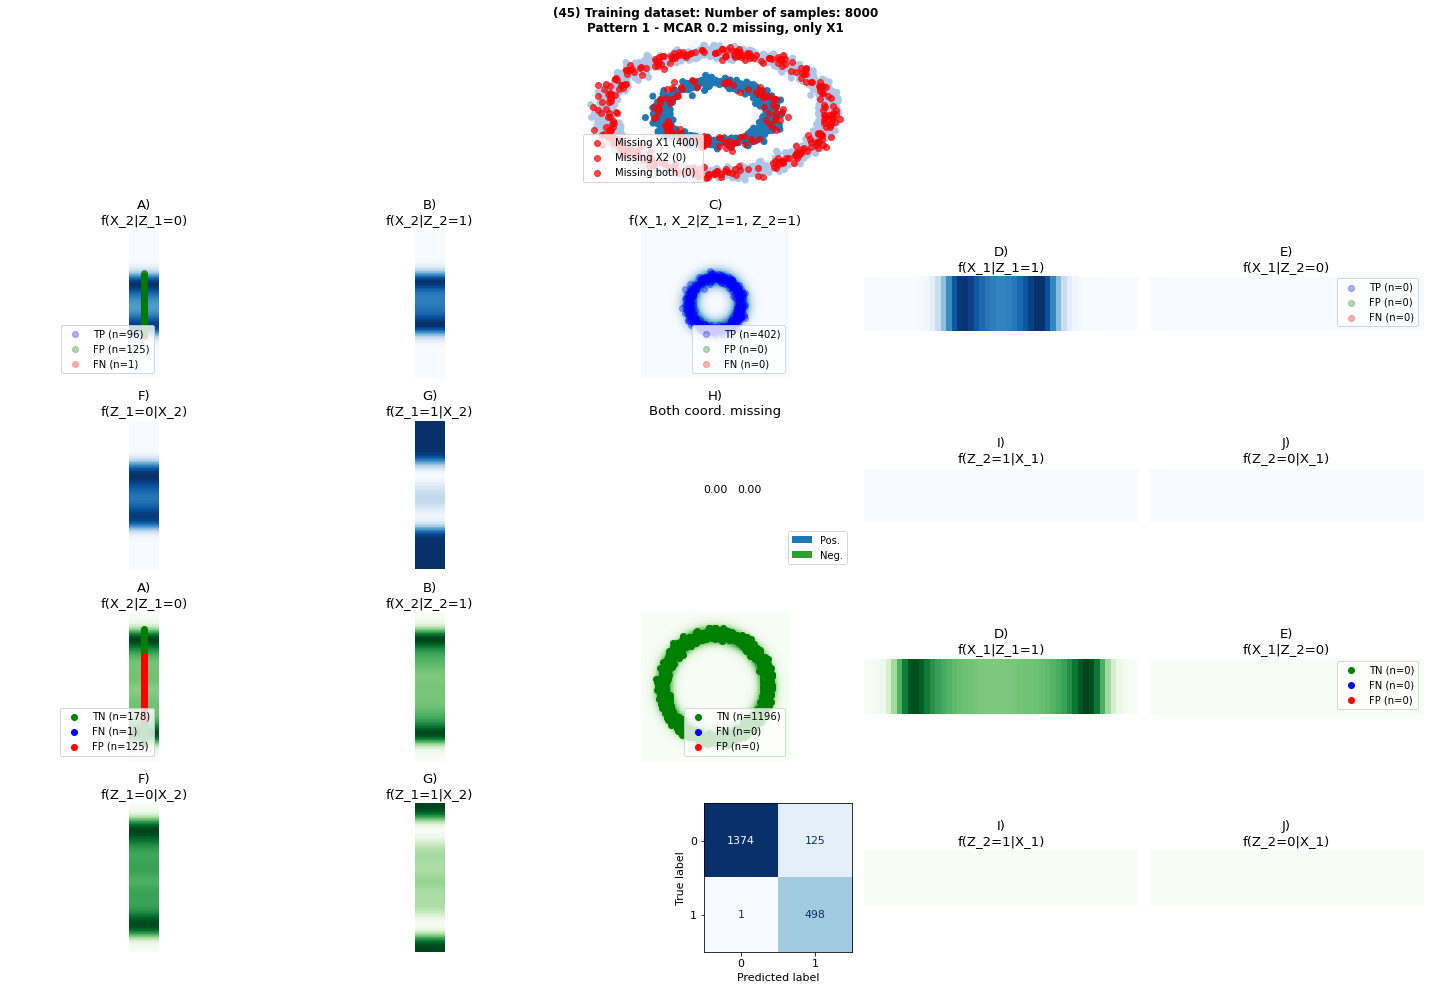

Sample: 499 positive and 1499 negative samples (#p/#n= 33%)



0
Accuracy                                            0.937
F1 score (2 PPVxTPR/(PPV+TPR))                      0.888
Matthews correlation coefficient (MCC)              0.855
Sensitivity, recall, hit rate, or true positive...  0.998
Specificity, selectivity or true negative rate ...  0.917
Precision or positive predictive value (PPV)        0.799
Negative predictive value (NPV)                     0.999
Miss rate or false negative rate (FNR)              0.002
False discovery rate (FDR=1-PPV)                    0.201
False omission rate (FOR=1-NPV)                     0.001

In [29]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
#print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=45,#random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

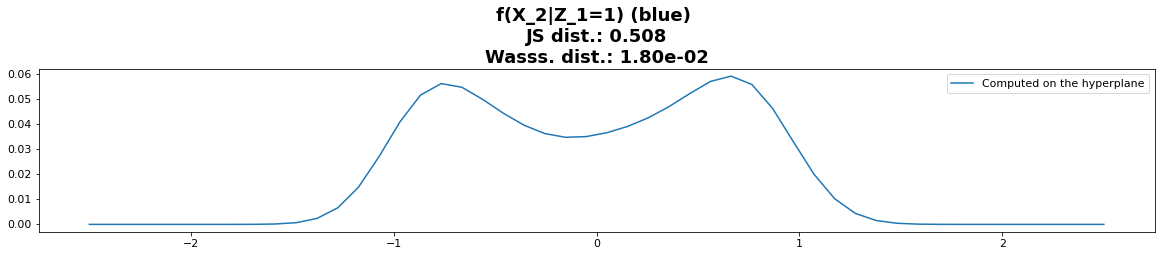

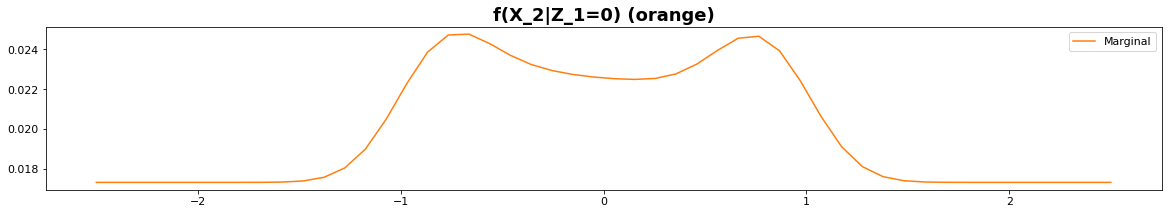

In [31]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_2, color='tab:blue',label='Computed on the hyperplane')
plt.title("f(X_2|Z_1=1) (blue) \nJS dist.: {:.3f}\nWasss. dist.: {:.2e}".format(distance.jensenshannon(exp.dist_pos.f_2, exp.dist_pos.f_2_marginal, 2.0), wasserstein_distance(exp.dist_pos.f_2, exp.dist_pos.f_2_marginal)), weight='bold', fontsize=18)
plt.legend()

fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_2_marginal, color='tab:orange', label='Marginal')
plt.title("f(X_2|Z_1=0) (orange)", weight='bold', fontsize=18)
plt.legend()


Experiment 44 loaded successfully! :-)


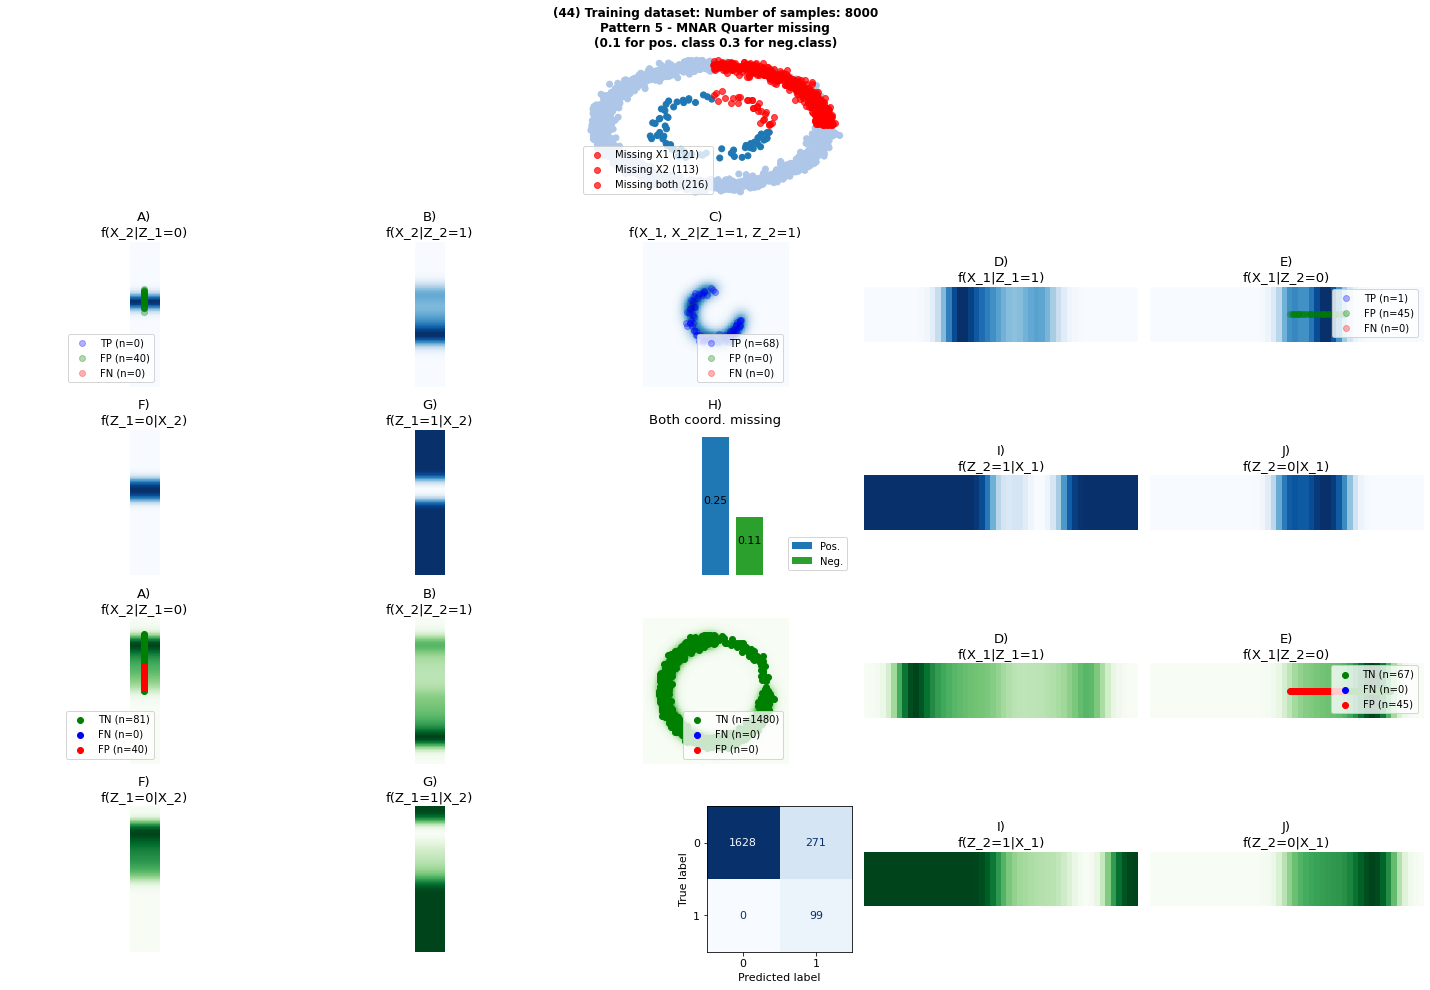

Sample: 99 positive and 1899 negative samples (#p/#n=  5%)



0
Accuracy                                            0.864
F1 score (2 PPVxTPR/(PPV+TPR))                      0.422
Matthews correlation coefficient (MCC)              0.479
Sensitivity, recall, hit rate, or true positive...  1.000
Specificity, selectivity or true negative rate ...  0.857
Precision or positive predictive value (PPV)        0.268
Negative predictive value (NPV)                     1.000
Miss rate or false negative rate (FNR)              0.000
False discovery rate (FDR=1-PPV)                    0.732
False omission rate (FOR=1-NPV)                     0.000

In [5]:
random_experiment = df[df['dataset_name']==dataset_name]['experiment_number'].sample(1).iloc[0].astype(int)
#print("Loading experiment {}".format(random_experiment))

# Create the experiments
exp = Experiments(dataset_name, 
                  dataset_train=None, 
                  dataset_test=None, 
                  purpose='classification', 
                  previous_experiment=44,#random_experiment, 
                  save_experiment=True, 
                  verbosity=1, 
                  debug=False, 
                  proportion_train=PROPORTION_TRAIN, 
                  resolution=RESOLUTION, 
                  bandwidth=BANDWIDTH,
                  random_state=RANDOM_STATE)

# Plot results
exp.plot()

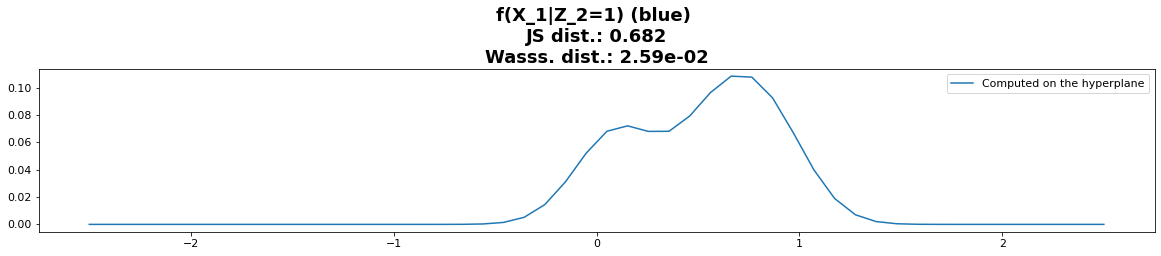

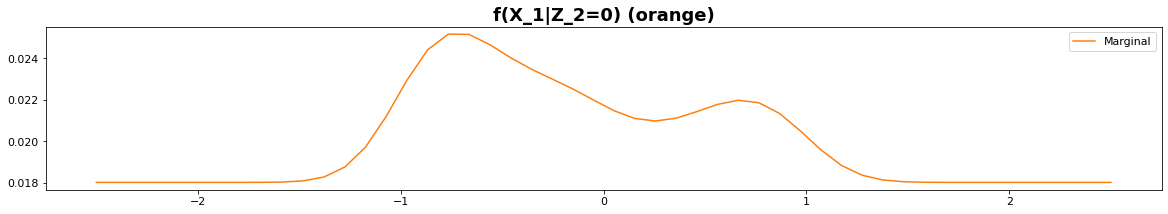

In [6]:
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_1, color='tab:blue',label='Computed on the hyperplane')
plt.title("f(X_1|Z_2=1) (blue) \nJS dist.: {:.3f}\nWasss. dist.: {:.2e}".format(distance.jensenshannon(exp.dist_pos.f_1, exp.dist_pos.f_1_marginal, 2.0), wasserstein_distance(exp.dist_pos.f_1, exp.dist_pos.f_1_marginal)), weight='bold', fontsize=18)
plt.legend()

fi(20, 3)
plt.plot(np.linspace(-2.5,2.5, exp.resolution), exp.dist_pos.f_1_marginal, color='tab:orange', label='Marginal')
plt.title("f(X_1|Z_2=0) (orange)", weight='bold', fontsize=18)
plt.legend()


# Dataframe with all the results - Analysis


In [12]:
columns = ['dataset_name', 'experiment_number','num_samples', 'imbalance_ratio', 'missingness_pattern',
                   'missingness_mechanism', 'ratio_of_missing_values', 'missing_X1',
                   'missing_X2', 'missing_first_quarter', 'ratio_missing_per_class_0','ratio_missing_per_class_1',
                   'Accuracy', 'F1', 'Sensitivity', 'Specificity', 'Precision']


df = create_df()
df_moons = df.query(" `dataset_name` == 'moons' ")
df_circles = df.query(" `dataset_name` == 'circles' ")

#df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio").drop_duplicates()

display(df[columns])
print("\n\n\n")
display(df_moons[columns].groupby('missingness_pattern').describe())
print("\n\n\n")

display(df_circles[columns].groupby('missingness_pattern').describe())
print("\n\n\n")

df_moons[columns].groupby('missingness_pattern').describe()

#df.query( " `dataset_name`==@dataset_name & `missingness_pattern`==1").drop_duplicates()

dataset_name  experiment_number num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter  ratio_missing_per_class_0  ratio_missing_per_class_1  Accuracy     F1  Sensitivity  Specificity  Precision
0          moons                 61        1999             0.40                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.364  0.311        0.358        0.369      0.274
1          moons                 95        1999             0.40                    5                  MNAR                    None       True       True                  True                        0.1                        0.3     0.271  0.197        0.224        0.303      0.176
2          moons                132        1999             0.50                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.354  0.355        0.355        0.353      0.355
3          moons                 59        1999             0.25                    4                  MNAR                    None       True       True                 False                        0.1                        0.3     0.369  0.282        0.495        0.328      0.197
4          moons                 92        1999             0.40                    2                   MAR                     0.2       True       True                  True                        NaN                        NaN     0.285  0.183        0.200        0.341      0.168
..           ...                ...         ...              ...                  ...                   ...                     ...        ...        ...                   ...                        ...                        ...       ...    ...          ...          ...        ...
206      circles                 13        1999             0.25                    2                   MAR                     0.2       True       True                  True                        NaN                        NaN     0.930  0.855        0.820        0.967      0.893
207      circles                  5        1999             0.50                    4                  MNAR                    None       True       True                 False                        0.1                        0.3     0.953  0.955        0.996        0.910      0.917
208      circles                 14        1999             0.25                    3                   MAR                     0.2       True      False                  True                        NaN                        NaN     0.935  0.885        1.000        0.913      0.793
209      circles                 22        1999             0.05                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.921  0.556        1.000        0.917      0.385
210      circles                 25        1999             0.05                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.921  0.556        1.000        0.917      0.385

[211 rows x 17 columns]

experiment_number                                                        imbalance_ratio                                                 ratio_missing_per_class_0                                             ratio_missing_per_class_1                                    Accuracy                                                           F1                                                        Sensitivity                                                        Specificity                                                        Precision                                                       
                                count       mean        std  min    25%   50%     75%    max           count      mean       std   min   25%   50%  75%  max                     count mean           std  min  25%  50%  75%  max                     count mean  std  min  25%  50%  75%  max    count      mean       std    min    25%    50%    75%    max count      mean       std    min    25%    50%    75%    max       count      mean       std    min    25%    50%    75%    max       count      mean       std    min    25%    50%    75%    max     count      mean       std    min    25%    50%    75%    max
missingness_pattern                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1                                34.0  79.147059  44.254178  1.0  42.25  83.5  124.75  134.0            34.0  0.311765  0.173668  0.05  0.25  0.40  0.5  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     34.0  0.365294  0.008354  0.354  0.354  0.364  0.371  0.375  34.0  0.246059  0.114307  0.060  0.231  0.311  0.355  0.355        34.0  0.372882  0.019860  0.355  0.355  0.358  0.379  0.404        34.0  0.365235  0.008176  0.353  0.353  0.369  0.369  0.373      34.0  0.215941  0.123980  0.033  0.167  0.274  0.355  0.355
2                                25.0  61.920000  36.911967  2.0  32.00  62.0   92.00  122.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     25.0  0.303920  0.015138  0.278  0.285  0.315  0.315  0.315  25.0  0.120360  0.065025  0.034  0.034  0.132  0.183  0.217        25.0  0.216000  0.018511  0.200  0.200  0.208  0.242  0.242        25.0  0.337760  0.013896  0.319  0.319  0.341  0.351  0.356      25.0  0.100040  0.067585  0.018  0.018  0.097  0.168  0.237
3                                25.0  63.000000  36.792209  3.0  33.00  63.0   93.00  123.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     25.0  0.254160  0.008325  0.245  0.245  0.252  0.265  0.265  25.0  0.148480  0.084221  0.039  0.039  0.157  0.234  0.272        25.0  0.288840  0.009982  0.277  0.282  0.283  0.303  0.303        25.0  0.244760  0.009492  0.232  0.232  0.249  0.254  0.254      25.0  0.116600  0.079892  0.021  0.021  0.109  0.201  0.267
4                                25.0  64.080000  36.674151  4.0  34.00  64.0   94.00  124.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                      25.0  0.1  1.416396e-17  0.1  0.1  0.1  0.1  0.1                      25.0  0.3  0.0  0.3  0.3  0.3  0.3  0.3     25.0  0.361120  0.022979  0.326  0.332  0.369  0.376  0.

experiment_number                                                      imbalance_ratio                                                      ratio_missing_per_class_0                                                                  ratio_missing_per_class_1                                                                       Accuracy                                                               F1                                                            Sensitivity                                                     Specificity                                                            Precision                                                           
                                count       mean        std  min    25%   50%    75%   max           count      mean       std   min     25%    50%    75%  max                     count      mean       std  min       25%       50%       75%       max                     count      mean       std       min       25%       50%       75%       max    count      mean       std    min      25%     50%     75%    max count      mean       std    min      25%     50%     75%    max       count      mean       std   min    25%    50%    75%  max       count      mean       std    min     25%     50%      75%    max     count      mean       std    min      25%     50%     75%    max
missingness_pattern                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1                                24.0  55.750000  30.578836  2.0  28.75  62.0  84.25  90.0            24.0  0.343750  0.181367  0.05  0.2250  0.425  0.500  0.5                       0.0       NaN       NaN  NaN       NaN       NaN       NaN       NaN                       0.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN     24.0  0.944000  0.014635  0.921  0.93425  0.9525  0.9560  0.960  24.0  0.862375  0.150751  0.556  0.86550  0.9490  0.9580  0.958        24.0  0.999125  0.002133  0.99  0.999  1.000  1.000  1.0        24.0  0.914917  0.004221  0.911  0.9120  0.9135  0.91700  0.931      24.0  0.784000  0.202067  0.385  0.76525  0.9035  0.9190  0.922
2                                13.0  36.461538  22.515237  3.0  18.00  36.0  54.00  72.0            13.0  0.246154  0.158721  0.05  0.1000  0.250  0.400  0.5                       0.0       NaN       NaN  NaN       NaN       NaN       NaN       NaN                       0.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN     13.0  0.925769  0.034509  0.833  0.91400  0.9300  0.9550  0.961  13.0  0.808308  0.098960  0.642  0.68300  0.8550  0.8870  0.911        13.0  0.862846  0.061836  0.82  0.839  0.842  0.848  1.0        13.0  0.941462  0.060597  0.804  0.9620  0.9670  0.96700  0.968      13.0  0.784154  0.174737  0.473  0.57100  0.8930  0.9190  0.955
3                                15.0  44.000000  26.538382  4.0  23.00  42.0  63.00  94.0            15.0  0.296667  0.180739  0.05  0.1250  0.300  0.475  0.5                       0.0       NaN       NaN  NaN       NaN       NaN       NaN       NaN                       0.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN     15.0  0.934933  0.013735  0.912  0.92800  0.9380  0.9470  0.950  15.0  0.828333  0.165570  0.531  0.77000  0.9070  0.9485  0.950        15.0  1.000000  0.000000  1.00  1.000  1.000  1.000  1.0        15.0  0.906600  0.008122  0.895  0.9005  0.9080  

experiment_number                                                        imbalance_ratio                                                 ratio_missing_per_class_0                                             ratio_missing_per_class_1                                    Accuracy                                                           F1                                                        Sensitivity                                                        Specificity                                                        Precision                                                       
                                count       mean        std  min    25%   50%     75%    max           count      mean       std   min   25%   50%  75%  max                     count mean           std  min  25%  50%  75%  max                     count mean  std  min  25%  50%  75%  max    count      mean       std    min    25%    50%    75%    max count      mean       std    min    25%    50%    75%    max       count      mean       std    min    25%    50%    75%    max       count      mean       std    min    25%    50%    75%    max     count      mean       std    min    25%    50%    75%    max
missingness_pattern                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1                                34.0  79.147059  44.254178  1.0  42.25  83.5  124.75  134.0            34.0  0.311765  0.173668  0.05  0.25  0.40  0.5  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     34.0  0.365294  0.008354  0.354  0.354  0.364  0.371  0.375  34.0  0.246059  0.114307  0.060  0.231  0.311  0.355  0.355        34.0  0.372882  0.019860  0.355  0.355  0.358  0.379  0.404        34.0  0.365235  0.008176  0.353  0.353  0.369  0.369  0.373      34.0  0.215941  0.123980  0.033  0.167  0.274  0.355  0.355
2                                25.0  61.920000  36.911967  2.0  32.00  62.0   92.00  122.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     25.0  0.303920  0.015138  0.278  0.285  0.315  0.315  0.315  25.0  0.120360  0.065025  0.034  0.034  0.132  0.183  0.217        25.0  0.216000  0.018511  0.200  0.200  0.208  0.242  0.242        25.0  0.337760  0.013896  0.319  0.319  0.341  0.351  0.356      25.0  0.100040  0.067585  0.018  0.018  0.097  0.168  0.237
3                                25.0  63.000000  36.792209  3.0  33.00  63.0   93.00  123.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                       0.0  NaN           NaN  NaN  NaN  NaN  NaN  NaN                       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN     25.0  0.254160  0.008325  0.245  0.245  0.252  0.265  0.265  25.0  0.148480  0.084221  0.039  0.039  0.157  0.234  0.272        25.0  0.288840  0.009982  0.277  0.282  0.283  0.303  0.303        25.0  0.244760  0.009492  0.232  0.232  0.249  0.254  0.254      25.0  0.116600  0.079892  0.021  0.021  0.109  0.201  0.267
4                                25.0  64.080000  36.674151  4.0  34.00  64.0   94.00  124.0            25.0  0.244000  0.152971  0.05  0.05  0.25  0.4  0.5                      25.0  0.1  1.416396e-17  0.1  0.1  0.1  0.1  0.1                      25.0  0.3  0.0  0.3  0.3  0.3  0.3  0.3     25.0  0.361120  0.022979  0.326  0.332  0.369  0.376  0.

In [48]:
missingness_pattern = 1


df_circles.query( "`missingness_pattern`==@missingness_pattern")

dataset_name  experiment_number         purpose fitted num_samples  imbalance_ratio  missingness_pattern missingness_mechanism ratio_of_missing_values missing_X1 missing_X2 missing_first_quarter  ratio_missing_per_class_0  ratio_missing_per_class_1  Accuracy     F1    MCC  Sensitivity  Specificity  Precision    PPV    NPV    FNR    FDR    FOR resolution  bandwidth  estimation_time_0  estimation_time_1
136      circles                 66  classification   True        1999             0.30                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.937  0.905  0.866        0.990        0.915      0.833  0.833  0.995  0.010  0.167  0.005         50        0.2         179.446238          82.976611
140      circles                 35  classification   True        1999             0.40                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.949  0.940  0.901        0.999        0.916      0.888  0.888  0.999  0.001  0.112  0.001         50        0.2         145.357931          97.255851
143      circles                 58  classification   True        1999             0.15                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.924  0.798  0.778        1.000        0.911      0.664  0.664  1.000  0.000  0.336  0.000         50        0.2         211.719055          37.960175
154      circles                  7  classification   True        1999             0.05                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.921  0.556  0.594        1.000        0.917      0.385  0.385  1.000  0.000  0.615  0.000         50        0.2         224.945309          11.824683
158      circles                 89  classification   True        1999             0.50                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.956  0.958  0.915        1.000        0.912      0.919  0.919  1.000  0.000  0.081  0.000         50        0.2         118.296534         118.118695
159      circles                 45  classification   True        1999             0.25                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.937  0.888  0.855        0.998        0.917      0.799  0.799  0.999  0.002  0.201  0.001         50        0.2         189.704166          63.627184
161      circles                 87  classification   True        1999             0.50                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.956  0.958  0.915        1.000        0.912      0.919  0.919  1.000  0.000  0.081  0.000         50        0.2         118.106063         118.645096
166      circles                 17  classification   True        1999             0.40                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.949  0.940  0.901        0.999        0.916      0.888  0.888  0.999  0.001  0.112  0.001         50        0.2         143.318916          95.459165
172      circles                 81  classification   True        1999             0.50                    1                  MCAR                     0.2       True      False                  None                        NaN                        NaN     0.956  0.958  0.915        1.000        0.912      0.919  0.919  1

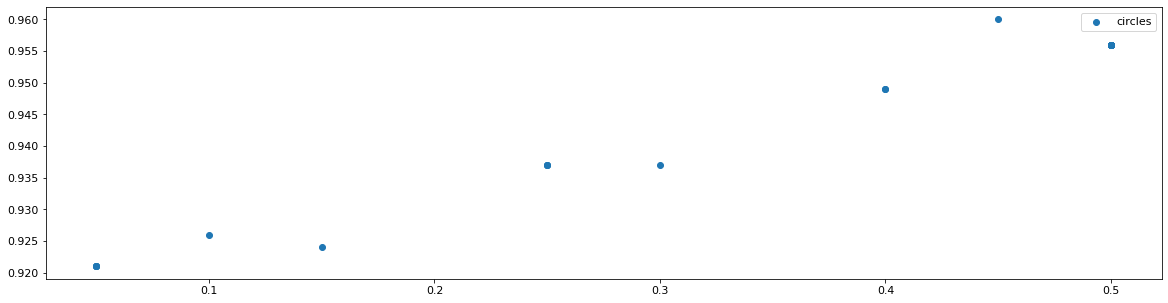

In [41]:
missingness_pattern = 1


xname = 'imbalance_ratio'
yname = 'Accuracy'


fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(df_circles.query( "`missingness_pattern`==@missingness_pattern")[xname], df_circles.query( "`missingness_pattern`==@missingness_pattern")[yname], label='circles')
#ax.scatter(df_moons.query( "`missingness_pattern`==@missingness_pattern")[xname], df_moons.query( "`missingness_pattern`==@missingness_pattern")[yname], label='moons')
#ax.set_ylim([0,1])
plt.legend()


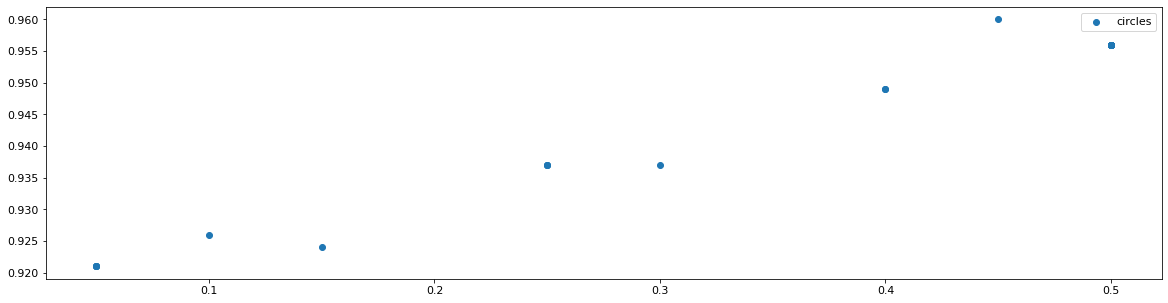

In [54]:
missingness_pattern = 1


xname = 'imbalance_ratio'
yname = 'Accuracy'


fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(df_circles.query( "`missingness_pattern`==@missingness_pattern")[xname], df_circles.query( "`missingness_pattern`==@missingness_pattern")[yname], label='circles')
#ax.scatter(df_moons.query( "`missingness_pattern`==@missingness_pattern")[xname], df_moons.query( "`missingness_pattern`==@missingness_pattern")[yname], label='moons')
#ax.set_ylim([0,1])
plt.legend()


Text(0.5, 1.0, 'Performances when Accuracy evolves\nDataset: moons and MP: 4')

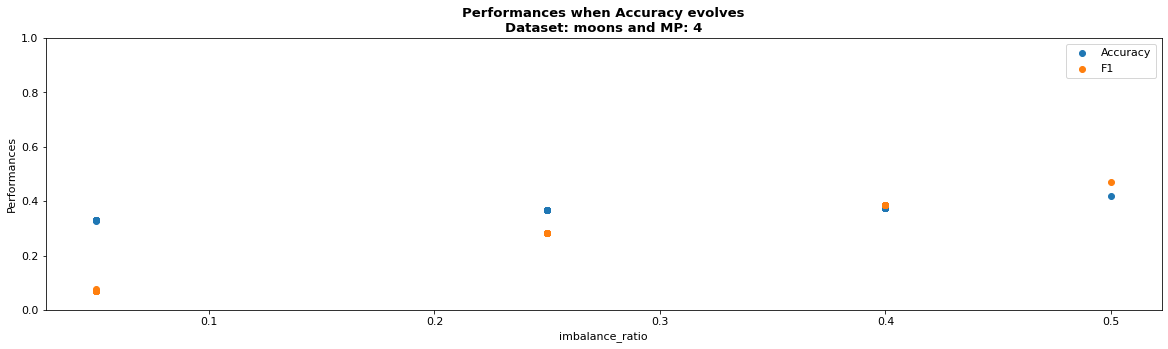

In [63]:
missingness_pattern=4
dataset_name = 'moons'



xname = 'imbalance_ratio'
yname = 'Accuracy'
yname2 = 'F1'

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_missing_per_class_0`==.1 & `ratio_missing_per_class_1`==.3")[xname], 
df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_missing_per_class_0`==.1 & `ratio_missing_per_class_1`==.3")[yname], label=yname)
ax.scatter(df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_missing_per_class_0`==.1 & `ratio_missing_per_class_1`==.3")[xname], 
df.query( "`dataset_name`==@dataset_name & `missingness_pattern`==@missingness_pattern & `ratio_missing_per_class_0`==.1 & `ratio_missing_per_class_1`==.3")[yname2], label=yname2)
#ax.scatter(df_moons.query( "`missingness_pattern`==@missingness_pattern")[xname], df_moons.query( "`missingness_pattern`==@missingness_pattern")[yname], label='moons')
ax.set_ylim([0,1])
plt.legend()

ax.set_xlabel(xname);ax.set_ylabel('Performances');ax.set_title("Performances when {} evolves\nDataset: {} and MP: {}".format(yname, dataset_name, missingness_pattern), weight='bold')
